In [1]:
%matplotlib inline

import os
HOME = os.path.expanduser("~")
JUPYTER = os.path.join(HOME, "workspace", "jupyter")
IMAGES = os.path.join(JUPYTER, "physchem", "images")
PHYSCHEM_LIION = os.path.join(JUPYTER, "physchem", "liion")

dict_keys(['RED_BLACK', 'CAPACITY', 'GREEN', 'PANEL2', 'PLOT2', 'PLOT3', 'PLOT32'])
f /Users/pm286/workspace/jupyter/physchem/liion/PMC7075112/pdfimages/image.4.3.117_479.722_864/raw.png True


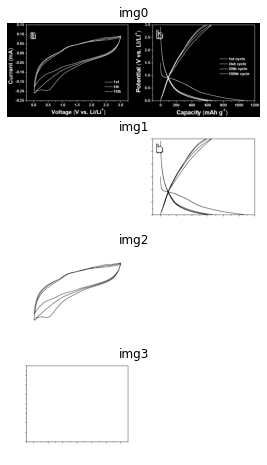

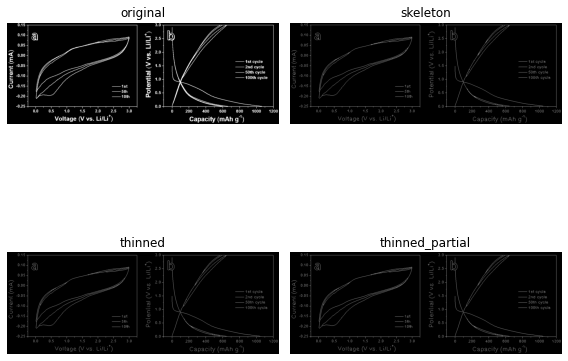

In [2]:
from labels import label_binary, thin_binary
PHYSCHEM_IMAGES = os.path.join(JUPYTER, "physchem", "images")
imgdict = {"RED_BLACK" : os.path.join(PHYSCHEM_IMAGES, "red_black_cv.png"),
        "CAPACITY" : os.path.join(PHYSCHEM_IMAGES, "capacitycycle.png"),
        "GREEN" : os.path.join(PHYSCHEM_LIION, 'PMC7077619/pdfimages/image.8.3.81_523.164_342/raw.png'),
        "PANEL2" : os.path.join(PHYSCHEM_LIION, 'PMC7075112/pdfimages/image.5.2.98_499.292_449/raw.png'),
        "PLOT2" : os.path.join(PHYSCHEM_LIION, 'PMC7075112/pdfimages/image.4.3.117_479.722_864/raw.png'),
        "PLOT3" : os.path.join(PHYSCHEM_LIION, 'PMC7074852/pdfimages/image.7.3.86_507.385_495/raw.png'),
        "PLOT32" : os.path.join(PHYSCHEM_LIION, 'PMC7067258/pdfimages/image.5.1.52_283.71_339/raw.png'),
          }

# https://note.nkmk.me/en/python-numpy-opencv-image-binarization/
import scipy.ndimage
from PIL import Image
import numpy as np
from collections import Counter

name = "RED_BLACK"
name = "PLOT2"
        
print(imgdict.keys())
image_file = imgdict[name]
print("f", image_file, os.path.exists(image_file))
label_binary(image_file, img_count=4, thresh=180)

thin_binary(image_file)


# Label image regions


This example shows how to segment an image with image labelling. The following
steps are applied:

1. Thresholding with automatic Otsu method
2. Close small holes with binary closing
3. Remove artifacts touching image border
4. Measure image regions to filter small objects


In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


# image = data.coins()[50:-50, 50:-50]
# requires grayscale
def labels(image):
    print("OTSU not yet implemented")
    return

    # apply threshold
    thresh = threshold_otsu(image)
    bw = closing(image > thresh, square(3))

    # remove artifacts connected to image border
    cleared = clear_border(bw)

    # label image regions
    label_image = label(cleared)
    # to make the background transparent, pass the value of `bg_label`,
    # and leave `bg_color` as `None` and `kind` as `overlay`
    image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image_label_overlay)

    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= 100:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
    
JUPYTER = "/Users/pm286/workspace/jupyter"
import os
import numpy as np
from PIL import Image
imagefile = os.path.join(JUPYTER, "physchem", "images", "red_black_cv.png")
image = Image.open(imagefile).convert('LA')
print("image", type(image))
labels = labels(image)
print("labels ", labels)

image <class 'PIL.Image.Image'>
OTSU not yet implemented
labels  None


In [4]:
print("s")

s


In [5]:
def findlines(image):
#    https://docs.opencv.org/3.4/dd/dd7/tutorial_morph_lines_detection.html
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
import numpy as np
import sys
import cv2 as cv


def show_wait_destroy(winname, img):
    cv.imshow(winname, img)
    cv.moveWindow(winname, 500, 0)
    cv.waitKey(0)
    cv.destroyWindow(winname)
def main(argv):
    # [load_image]
    # Check number of arguments
    if len(argv) < 1:
        print ('Not enough parameters')
        print ('Usage:\nmorph_lines_detection.py < path_to_image >')
        return -1
    # Load the image
    src = cv.imread(argv[0], cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1
    # Show source image
    cv.imshow("src", src)
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    show_wait_destroy("gray", gray)
    # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv.bitwise_not(gray)
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
    show_wait_destroy("binary", bw)
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv.erode(horizontal, horizontalStructure)
    horizontal = cv.dilate(horizontal, horizontalStructure)
    # Show extracted horizontal lines
    show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    show_wait_destroy("vertical", vertical)
    # [vert]
    # [smooth]
    # Inverse vertical image
    vertical = cv.bitwise_not(vertical)
    show_wait_destroy("vertical_bit", vertical)
    '''
    Extract edges and smooth image according to the logic
    1. extract edges
    2. dilate(edges)
    3. src.copyTo(smooth)
    4. blur smooth img
    5. smooth.copyTo(src, edges)
    '''
    # Step 1
    edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    show_wait_destroy("edges", edges)
    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv.dilate(edges, kernel)
    show_wait_destroy("dilate", edges)
    # Step 3
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv.blur(smooth, (2, 2))
    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    # Show final result
    show_wait_destroy("smooth - final", vertical)
    # [smooth]
    return 0

if __name__ == "__main__":
    main(sys.argv[1:])        
    nparray = Image.toarray(image)
    window = 3
    print("imng ", image.size())

IndentationError: expected an indented block (<ipython-input-5-5b10347d578a>, line 6)